# Описание проекта

## Контекст

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

[Ссылка на скачивание файла](https://code.s3.yandex.net/datasets/games.csv)

### Основные этапы исследования:

### Шаг 1: Загрузка данных

### Шаг 2: Изучение и предобработка данных 

### Шаг 3: Исследовательский анализ данных

### Шаг 4: Формирование портрета пользователя каждого региона

### Шаг 5: Проверка гипотез

### Шаг 6: Прогнозирование данных (собственная инициатива)

### Шаг 7: Формирование выводов

## Импортируем необходимые библиотеки

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Шаг 1: Загрузка данных

In [5]:
# URL файла
url = "https://code.s3.yandex.net/datasets/games.csv"

try:
    # Пытаемся загрузить файл
    response = requests.get(url)
    response.raise_for_status()  # Вызывает ошибку для статусов 4xx и 5xx

    # Сохраняем контент в файл
    with open('games.csv', 'wb') as f:
        f.write(response.content)

    # Загружаем файл в DataFrame
    data = pd.read_csv('games.csv')
    # Сообщение об успешной загрузке
    print("Файл успешно загружен")

except Exception as err:
    # Обработка ошибок
    print("Ошибка загрузки:", err)

Файл успешно загружен


<font color='DarkBlue'><b>Комментарий студента</b></font><br>

</font><font color='Blue'><b>Начиная с третьего проекта ревьюеры требовали от меня запуск файла методом try-exept</b></font><br>

## Шаг 2: Изучение и предобработка данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверка на наличие дубликатов

In [11]:
has_duplicates = data.duplicated().any()
print(f"Есть дубликаты: {has_duplicates}")

# Подсчет количества дубликатов
num_duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Есть дубликаты: False
Количество дубликатов: 0


In [12]:
# Поиск неявных дубликатов
duplicates = data[data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]

# Вывод дубликатов
display(duplicates)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


<font color='DarkBlue'><b>Комментарий студента</b></font><br>

</font><font color='Blue'><b>Проверка по этим трем показателям произведена, однако у них есть различия по показателям в продажах, поэтому удалять их не будем</b></font><br>

In [14]:
# Удаление строк с пропусками в столбцах 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'
data.dropna(subset=['Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'], how='all', inplace=True)

### Приведем название столбцов к нижнему регистру

In [16]:
data.columns = data.columns.str.lower()

<span style="color: blue;">'TBD' расшифровывается как 'To Be Determined' или 'To Be Decided'. В контексте игр, фильмов или других развлечений этот термин часто используется для обозначения информации, которая ещё не определена или не доступна. Например, если в обзоре игры указан рейтинг пользователя как 'TBD', это означает, что на момент написания обзора у игры нет достаточного количества отзывов для определения рейтинга, или результат ещё не был определён. Поэтому заменим 'tbd' на NaN так как по своей сути это одно и то же.</span>

In [18]:
# Заменяем 'tbd' и другие недопустимые значения на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Преобразуем столбец в float
data['user_score'] = data['user_score'].astype(float)

<span style="color: blue;">При изучении данных мы увидели значительное количество пропусков в столбцах 'critic_score', 'user_score' и 'rating'. На мой взгляд лучше заменить их строкой 'no rating', нежели заменить нулями, средним или медианным значениями либо оставить NaN, поэтому я поступлю именно так.</span>

<span style="color: blue;">Что касается причины возникновения пропусков в этих столбцах, то причин может быть несколько: сбой в системе, отсутвие технической возможности или сервиса, способного дать тот или иной рейтинг либо это было неактуально давать рейтинг на тот или иной момент.</span>

<span style="color: blue;">Все остальные пропуски в таких столбцах, как year_of_release, name и genre количество пропусков незначительно, поэтому с ними мы ничего делать не будем.</span>

In [20]:
# Устранение NaN в указанных столбцах
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('no rating')

### Считаем суммарные продажи во всех регионах и занесем в новый столбец

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Проверяем изменения
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38


### Вывод о предобработке данных

1. **Загрузка и изучение датасета:** Датасет был успешно загружен и проанализирован для дальнейшей работы.
   
2. **Проверка на дубликаты:** Проведена проверка на наличие явных и неявных дубликатов, что позволяет обеспечить уникальность записей.

3. **Приведение названий столбцов:** Все названия столбцов были приведены к нижнему регистру для унификации и удобства работы с данными.

4. **Преобразование типов данных:** Столбец `user_score` был преобразован в тип данных `float`, что позволяет проводить числовые операции.

5. **Создание нового столбца:** Добавлен столбец с суммарными продажами, что позволяет более эффективно анализировать данные.

6. **Обработка пропусков:** В столбцах `critic_score`, `user_score` и `rating` вместо пропусков были установлены заглушки, что помогает избежать искажений в анализе.

## Шаг 3: Исследовательский анализ данных

### Визуализация распределения выпущенных игр по годам

In [26]:
games_per_year = data['year_of_release'].value_counts().sort_index()

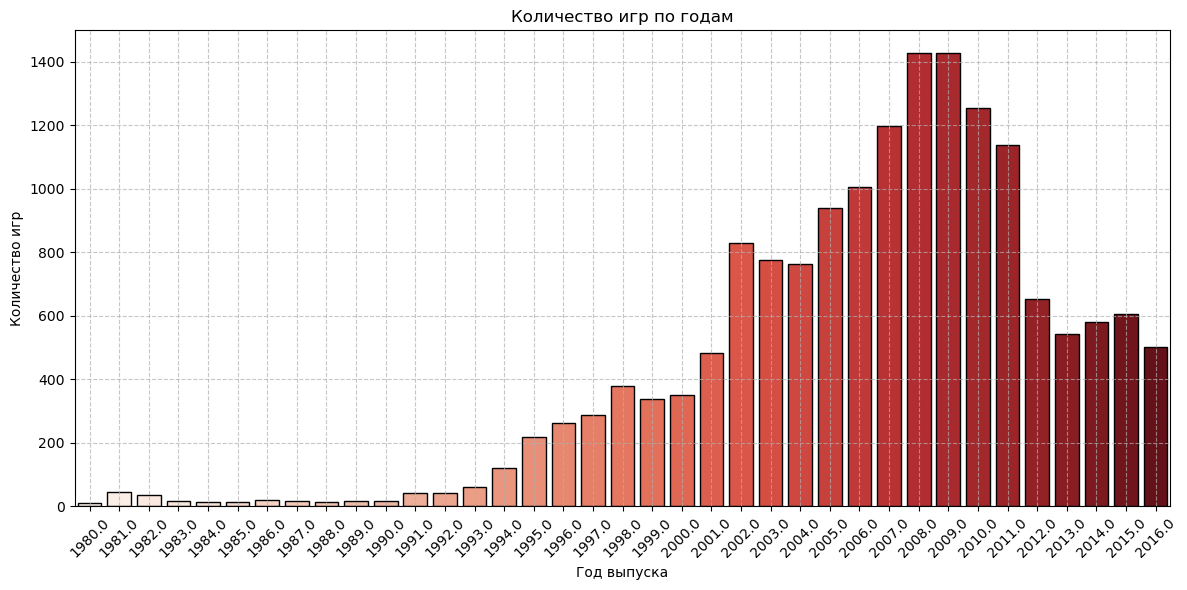

In [27]:
plt.figure(figsize=(12, 6))  # Размер графика
bar_plot = sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='Reds')

# Добавление черного контура к столбцам
for bar in bar_plot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

plt.xticks(rotation=45)  # Поворот подписей для оси X
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(linestyle='--', alpha=0.7)
plt.title('Количество игр по годам')
plt.tight_layout()  # Подгонка для улучшения отображения
plt.show()

<span style="color: blue;">Из графика видно, что рост количества игр идет начиная с 1994 года, что очевидно ведь примерно тогда и появились первые компьютеры поддерживающие игры. После 2009 наблюдаем спад. На мой взгляд это связано со значительным развитием игр на мобильных устройствах: мобильные телефоны, PSP, Nintendo и т.п.</span>

## Визуализация распределения продаж игр по годам для топовых платформ

<font color='DarkBlue'><b>Комментарий студента</b></font><br>

</font><font color='Blue'><b>Я не стал загромождать проект изначальным графиком, а потом исправленным. Да при проверке выяснилось, присутствует в данных одна игра выпущенная в 1985 году, скорее всего это ошибка. Удалил и затем визуализировал график с "чистыми" данными.</b></font><br>

In [31]:
ds_games_1985 = data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]
count_ds_games_1985 = ds_games_1985.shape[0]
print(f'Количество игр на платформе DS в 1985 году: {count_ds_games_1985}')

# Фильтруем игры на платформе DS в 1985 году
ds_games_1985 = data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

# Удаляем эти игры из DataFrame
data = data[~data.index.isin(ds_games_1985.index)]

Количество игр на платформе DS в 1985 году: 1


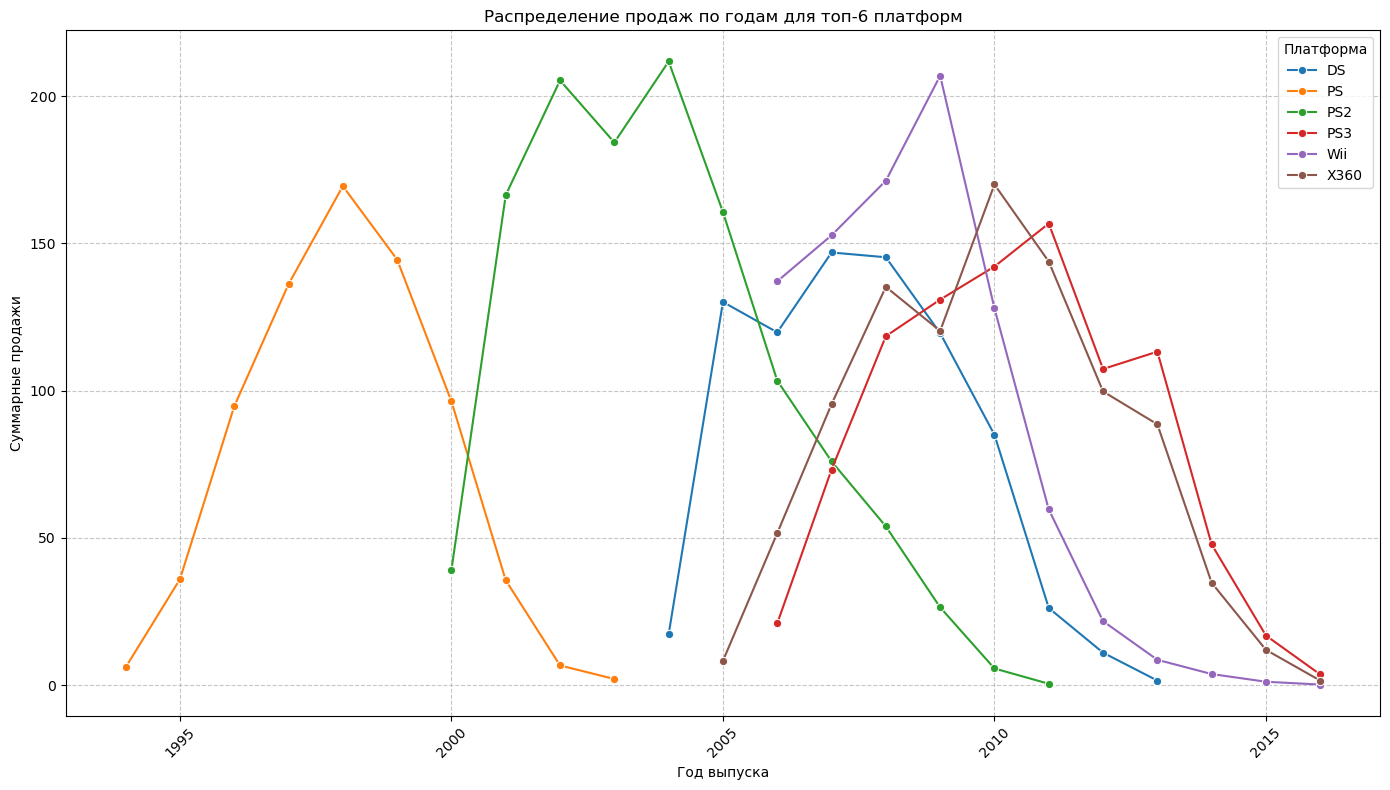

In [32]:
# Сгруппируем данные по платформам и годам
platform_sales = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Расчёт суммарных продаж для каждой платформы
total_sales_per_platform = platform_sales.groupby('platform')['total_sales'].sum().reset_index()

# Выбираем топ-5 платформ с наибольшими продажами
top_platforms = total_sales_per_platform.nlargest(6, 'total_sales')['platform']

# Фильтруем данные только по топовым платформам
top_platform_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]

# Построение графика
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_platform_sales, x='year_of_release', y='total_sales', hue='platform', marker='o')

# Настройки графика
plt.title('Распределение продаж по годам для топ-6 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()  # Подгонка для улучшения отображения
plt.show()

In [33]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = (time_life['max'] - time_life['min'])/2
time_life['life'].median()

3.0

<span style="color: blue;">Зададим актуальный период - 3 года. Соответственно зададим диапазон данных с 2014 по 2016 года а все, что было ранее отбросим</span>

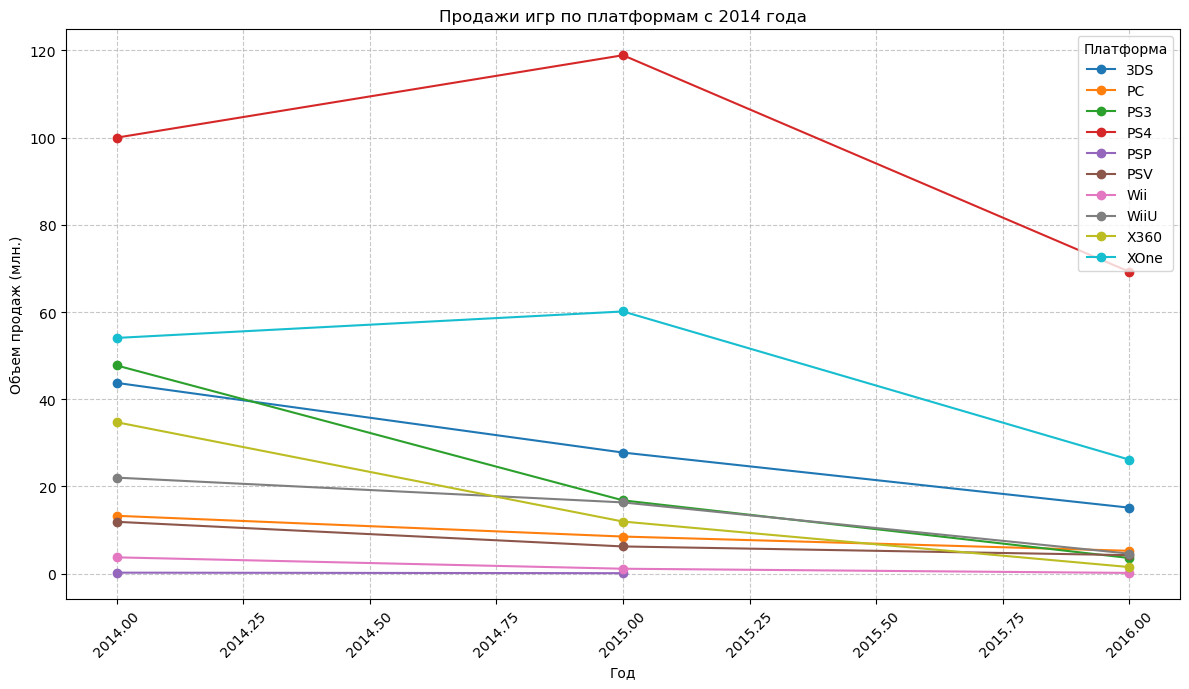

In [35]:
filtered_data = data[data['year_of_release'] >= 2014]

# Группируем продажи по годам и платформам
sales_by_platform = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Построение графика
plt.figure(figsize=(12, 7))

# Создаем линию для каждой платформы с маркерами
for platform in sales_by_platform.columns:
    plt.plot(sales_by_platform.index, sales_by_platform[platform], marker='o', label=platform)

# Добавление заголовка и подписей
plt.title('Продажи игр по платформам с 2014 года')
plt.xlabel('Год')
plt.ylabel('Объем продаж (млн.)')
plt.legend(title='Платформа')
plt.xticks(rotation=45)

# Добавление сетки
plt.grid(linestyle='--', alpha=0.7)

# Упорядочиваем график для лучшего отображения
plt.tight_layout()  
plt.show()

<span style="color: blue;">
Топ-3 платформы на 2016 год являются: 
    
- PS4
  
- XOne

- 3DS

В целом мы наблюдаем тенденцию снижения продаж игр на все платформы, что говорит о "затухании" рынка игр.

</span>

## Построение ящиков с усами по глобальным продажам с разбивкой по платформам

In [38]:
# Фильтрация данных по году выпуска
filtered_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

# Группировка данных по платформе и суммирование общих продаж
grouped_data = filtered_data.groupby('platform')['total_sales'].sum().reset_index()

In [39]:
grouped_data.describe()

,total_sales
count,10.000000
mean,72.945000
std,86.355404
min,0.360000
25%,23.562500
50%,45.600000
75%,82.055000
max,288.150000


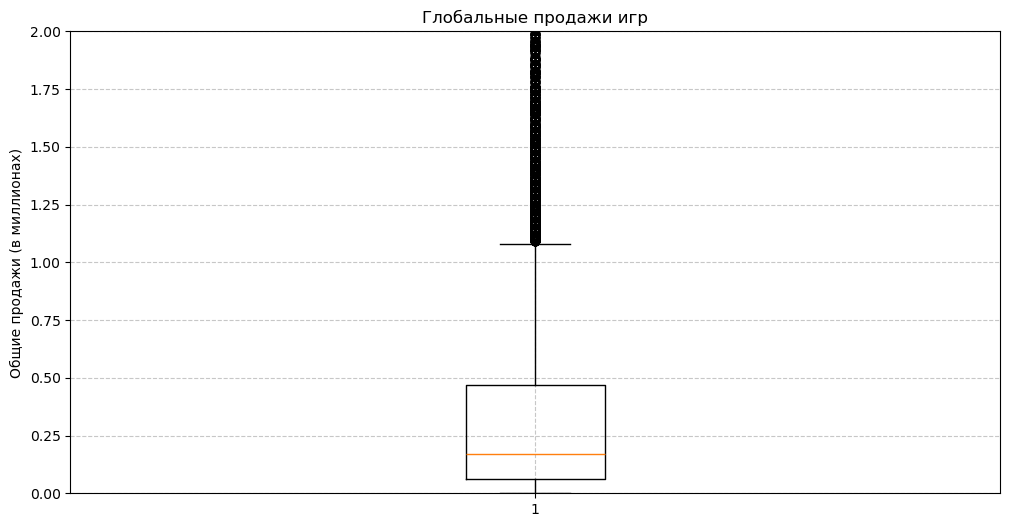

In [40]:
plt.figure(figsize=(12, 6))
plt.boxplot(data['total_sales'])
plt.title('Глобальные продажи игр')
plt.ylabel('Общие продажи (в миллионах)')
plt.ylim(0, 2)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

<span style="color: blue;">В среднем глобально продается 1 млн 62 тысячи игр на платформу, однако медиана составляет 196 тысяч экземпляров, что указывает на значительную положительную ассиметрию. Это связано с тем, что разброс продаж для разных платформ значительно высок.</span>

In [42]:
pivot_table = filtered_data.groupby('platform')['total_sales'].describe().reset_index()

# Вывод сводной таблицы
display(pivot_table)

,platform,count,mean,std,min,25%,50%,75%,max
0,3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
1,PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
2,PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
3,PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
4,PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
5,PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
6,Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
7,WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
8,X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
9,XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


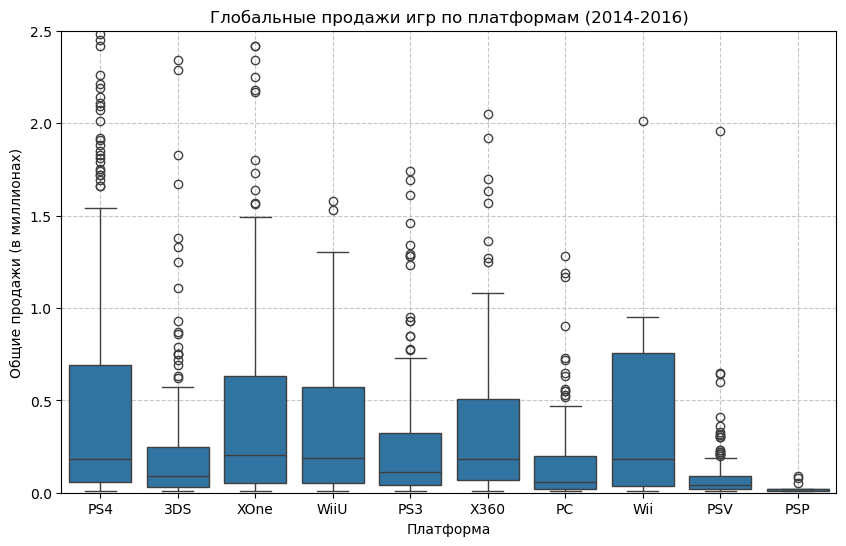

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_data)
plt.title('Глобальные продажи игр по платформам (2014-2016)')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи (в миллионах)')
plt.ylim(0, 2.5)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

## Рассмотрим топ-6 платформ

<Figure size 1200x600 with 0 Axes>

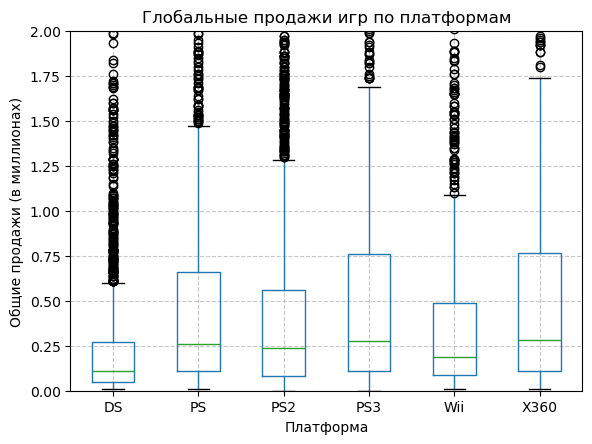

In [45]:
# Фильтруем данные для нужных платформ
platforms = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
filtered_data = data[data['platform'].isin(platforms)]
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='total_sales', by='platform')

plt.title('Глобальные продажи игр по платформам')
plt.suptitle('')  # Убрать верхний заголовок
plt.xlabel('Платформа')
plt.ylabel('Общие продажи (в миллионах)')

# Установите лимит от 0 до 1.5 по оси Y
plt.ylim(0, 2)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

<span style="color:blue;">Среди топовых платформ самая низкая медиана продаж наблюдается у Nintendo DS, которая составляет 100 тысяч единиц. Верхняя граница продаж для этой платформы составляет 550 тысяч единиц. У остальных платформ медиана варьируется от 180 до 250 тысяч единиц.</span>

<span style="color:blue;">Максимальные границы продаж, за которыми находятся аномалии, принадлежат X360 и PS3 и составляют 1,7 миллиона единиц. Для остальных платформ, за исключением Nintendo DS, верхняя граница находится в диапазоне 1-1,5 миллиона единиц.</span>

<span style="color:blue;">Визуально по ящикам наилучшие показатели у платформы X360, поэтому для исследования влияния отзывов пользователей и критиков возьмем ее за образец для построения диаграммы рассеяния и рассчета корреляции между отзывами и продажами.</span>

<span style="color: blue;">
    
В среднем глобально продается 96 тысяч игр на платформу, однако медиана составляет 162 тысячи экземпляров, что указывает на значительную положительную ассиметрию. Это связано с тем, что разброс продаж для разных платформ значительно высок.

## Вывод по статистике продаж игр (2014-2016)

- **Лидеры по продажам:** PS4 (среднее 0.80 млн) и PS3 (0.63 млн) занимают верхние позиции.
- **Наибольший разброс:** PS4 имеет стандартное отклонение 1.61, что указывает на значительные колебания в продажах.
- **Максимальные продажи:** PS3 достигла максимума в 21.05 млн, минимальные продажи на всех платформах составляют 0.01 млн.
- **Низкие показатели:** PSP и PSV имеют низкие средние продажи (0.09 и 0.13 млн), что может свидетельствовать о их меньшей популярности.
- **Количество игр:** 3DS лидирует по количеству игр (512), но средние продажи (0.50 млн) ниже, чем у PS4.

В целом, платформы Sony (PS3 и PS4) доминируют на рынке, в то время как PSP и PSV показывают значительно меньшие результаты.

</span>

In [48]:
# Фильтруем по платформе X360
x360_data = data[(data['platform'] == 'X360') & (data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

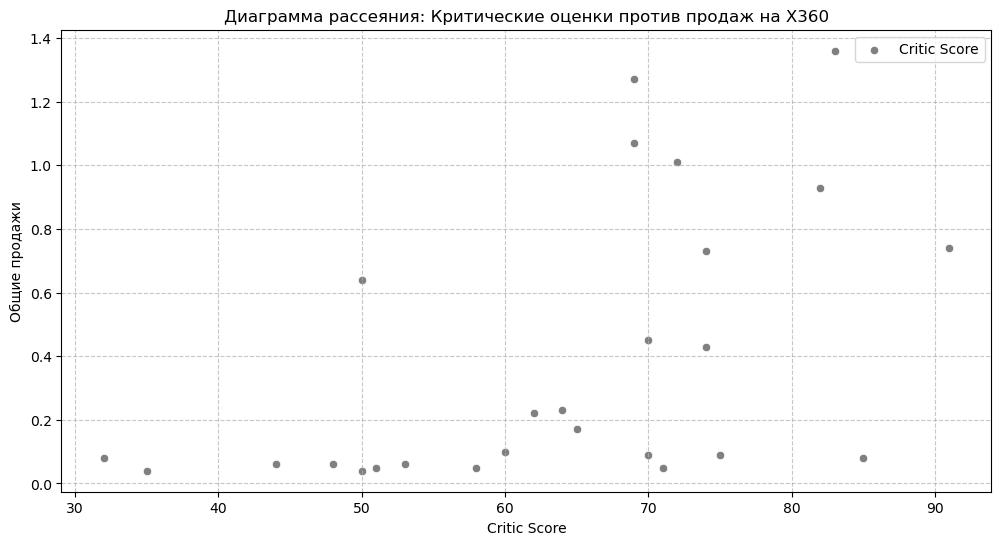

In [49]:
# Фильтруем данные, чтобы исключить строки с "-1" для критических оценок
filtered_x360_data_critic_1 = x360_data[x360_data['critic_score'] != -1]

# Создание первого графика для Critic Score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_x360_data_critic_1, x='critic_score', y='total_sales', color='grey', label='Critic Score')
plt.title('Диаграмма рассеяния: Критические оценки против продаж на X360')
plt.xlabel('Critic Score')
plt.ylabel('Общие продажи')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

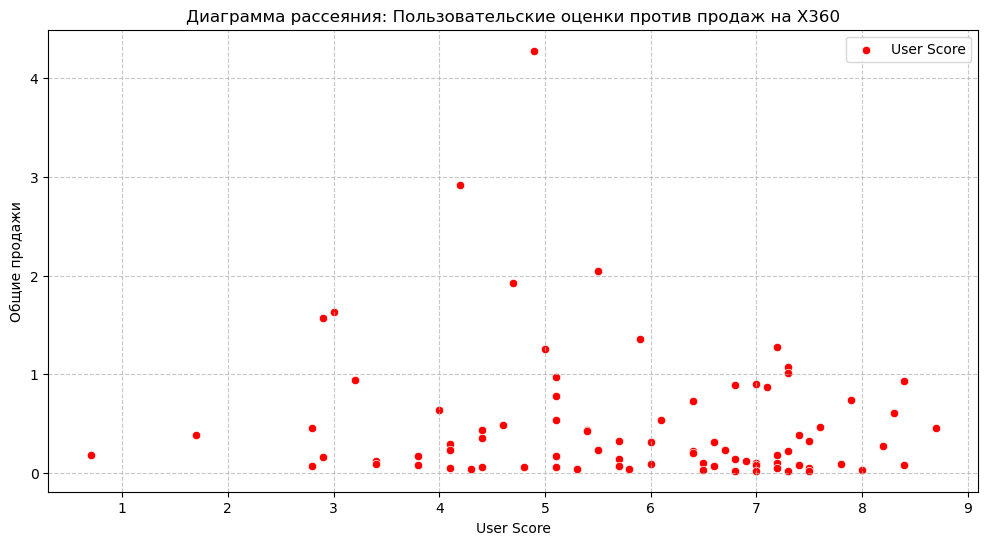

In [50]:
filtered_x360_data_user_2 = x360_data[x360_data['user_score'] != -1]

# Создание второго графика для User Score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_x360_data_user_2, x='user_score', y='total_sales', color='red', label='User Score')
plt.title('Диаграмма рассеяния: Пользовательские оценки против продаж на X360')
plt.xlabel('User Score')
plt.ylabel('Общие продажи')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [51]:
# Корреляция
critic_corr = filtered_x360_data_critic_1['critic_score'].corr(x360_data['total_sales']).round(2)
user_corr = filtered_x360_data_user_2['user_score'].corr(x360_data['total_sales']).round(2)

print(f'Корреляция между оценками критиков и продажами: {critic_corr}')
print(f'Корреляция между пользовательскими оценками и продажами: {user_corr}')

Корреляция между оценками критиков и продажами: 0.53
Корреляция между пользовательскими оценками и продажами: -0.14


<span style="color:blue;">Корреляция между оценками критиков и продажами(0,39) выше чем корреляция между пользовательскими оценками и продажами (0,11).</span>

### Рассмотрим корреляцию на топовых платформах

In [54]:
platforms = data['platform'].unique()  # Получаем все уникальные платформы из данных
correlation_results = {}

for platform in platforms:
    # Фильтруем данные по платформе и по годам
    platform_data = data[(data['platform'] == platform) & (data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

    # Исключаем строки с "no rating" для критических и пользовательских оценок
    filtered_platform_data = platform_data.query("critic_score != 'no rating' and user_score != 'no rating'")

    # Преобразование оценок в числовой формат
    filtered_platform_data['critic_score'] = pd.to_numeric(filtered_platform_data['critic_score'], errors='coerce')
    filtered_platform_data['user_score'] = pd.to_numeric(filtered_platform_data['user_score'], errors='coerce')

    # Удаление заглушек (-1) только для critic_score
    filtered_critic_data = filtered_platform_data[filtered_platform_data['critic_score'] != -1]
    # Удаление возможных NaN
    filtered_critic_data = filtered_critic_data.dropna(subset=['critic_score', 'total_sales'])

    # Рассчитываем корреляцию для critic_score
    if not filtered_critic_data.empty:
        critic_corr = filtered_critic_data['critic_score'].corr(filtered_critic_data['total_sales']).round(4)
    else:
        critic_corr = None

    # Удаление заглушек (-1) только для user_score
    filtered_user_data = filtered_platform_data[filtered_platform_data['user_score'] != -1]
    # Удаление возможных NaN
    filtered_user_data = filtered_user_data.dropna(subset=['user_score', 'total_sales'])

    # Рассчитываем корреляцию для user_score
    if not filtered_user_data.empty:
        user_corr = filtered_user_data['user_score'].corr(filtered_user_data['total_sales']).round(4)
    else:
        user_corr = None

    correlation_results[platform] = {'critic_score_corr': critic_corr, 'user_score_corr': user_corr}

# Создание сводной таблицы
correlation_df = pd.DataFrame(correlation_results).T
correlation_df.index.name = 'Platform'

# Удаление строк с None
correlation_df = correlation_df.dropna()

# Функция для окраски минимальных и максимальных значений
def highlight_min_max(s):
    return [
        'background-color: yellow' if v else 'background-color: red' if m else ''
        for v, m in zip(s == s.min(), s == s.max())
    ]

# Применение функции к DataFrame и добавление общего стиля границы
styled_correlation_df = (
    correlation_df.style
    .apply(highlight_min_max, subset=['critic_score_corr', 'user_score_corr'])
    .set_table_attributes('style="border: 2px solid black; border-collapse: collapse;"')
)

# К каждой ячейке добавляем черный контур
styled_correlation_df.set_properties(**{'border': '2px solid black', 'border-collapse': 'collapse'})

# Отображаем сводную таблицу
display(styled_correlation_df)

,critic_score_corr,user_score_corr
Platform,,
X360,0.525700,-0.138400
PS3,0.446600,-0.166800
PS4,0.402700,-0.040100
3DS,0.314100,0.215200
PC,0.174600,-0.071600
XOne,0.428700,-0.070400
WiiU,0.370200,0.407900
PSV,0.042700,-0.168500


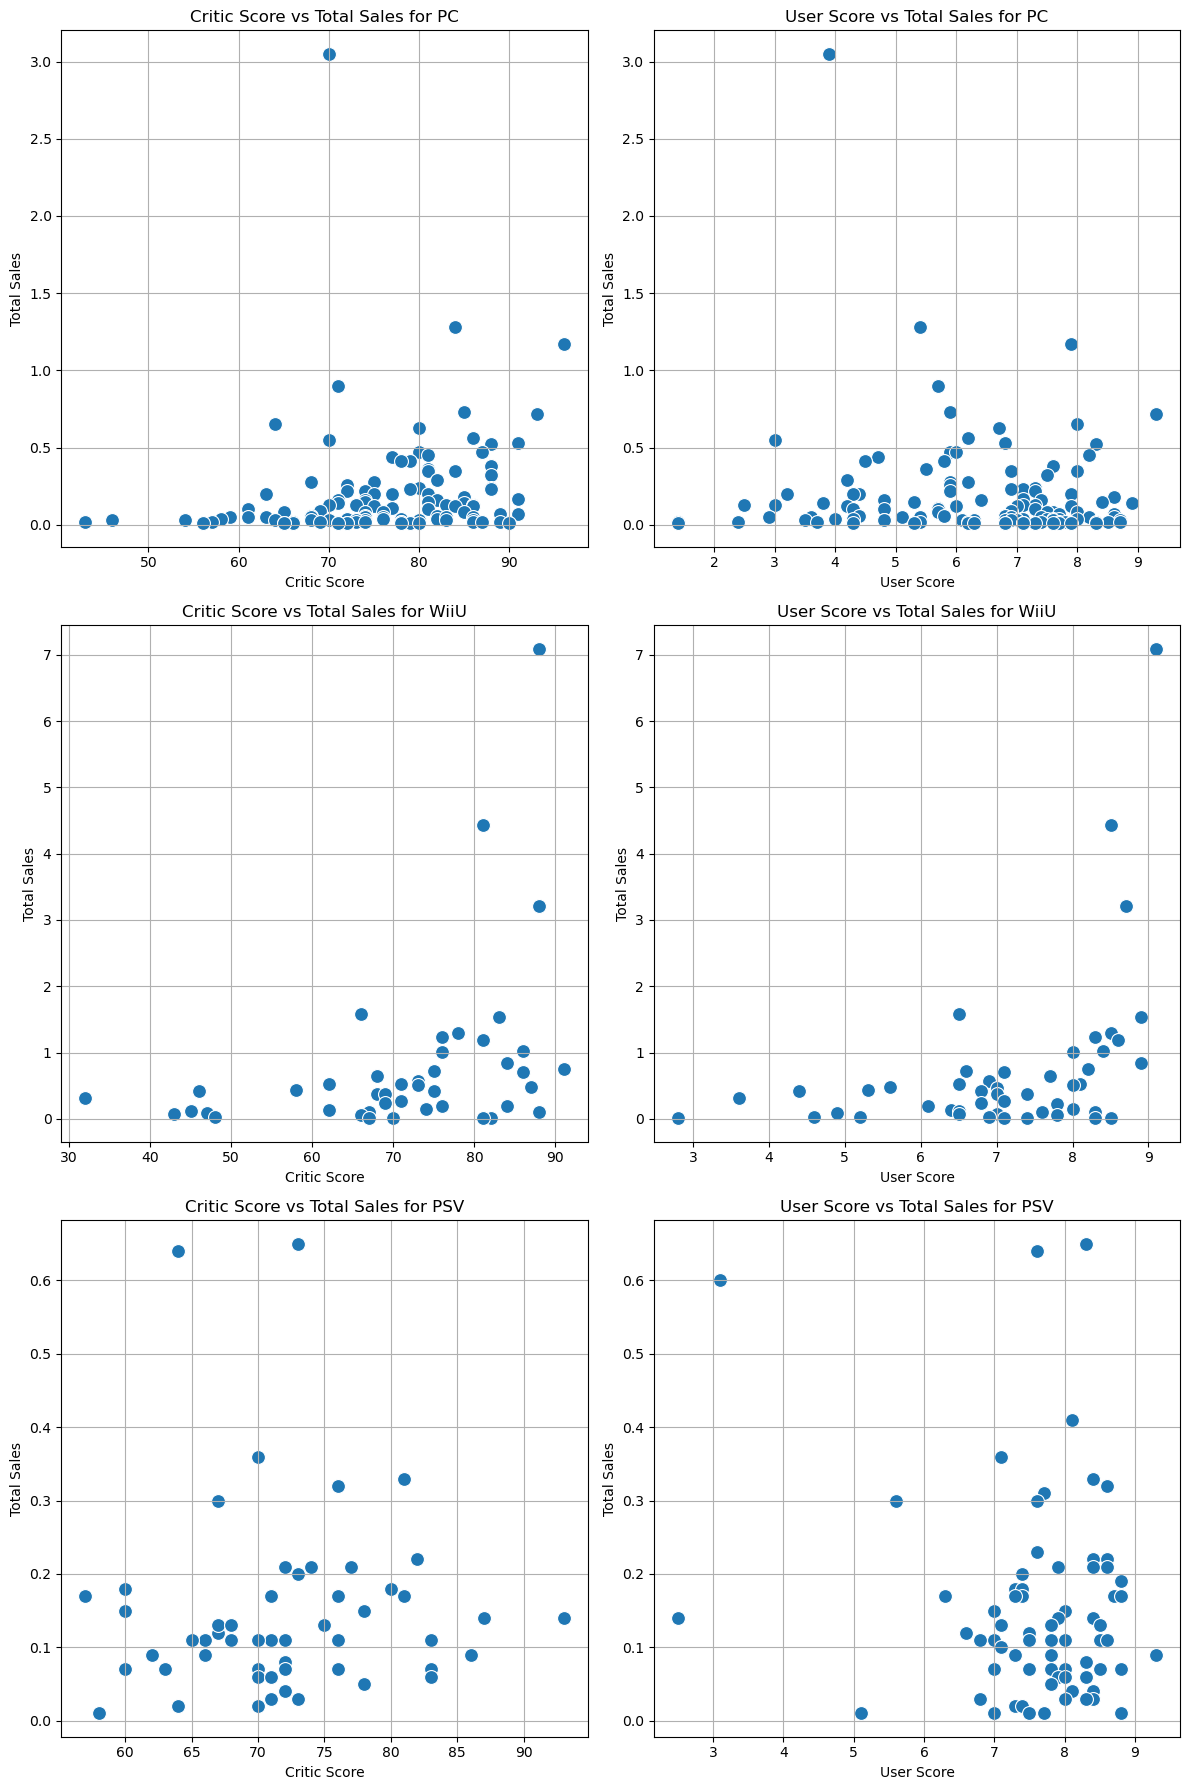

In [55]:
# Фильтруем данные по платформам и годам, исключая заглушки -1
filtered_data = data[
    ((data['platform'] == 'PC') | (data['platform'] == 'WiiU') | (data['platform'] == 'PSV')) &
    (data['year_of_release'].between(2014, 2016))
]

# Создание подграфиков
platforms = ['PC', 'WiiU', 'PSV']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

for i, platform in enumerate(platforms):
    platform_data = filtered_data[filtered_data['platform'] == platform]
    
    # График для Critic Score относительно Total Sales
    platform_data_critic = platform_data[platform_data['critic_score'] != -1]  # Фильтруем только critic_score
    sns.scatterplot(data=platform_data_critic, x='critic_score', y='total_sales', ax=axes[i, 0], s=100)
    axes[i, 0].set_title(f'Critic Score vs Total Sales for {platform}')
    axes[i, 0].set_xlabel('Critic Score')
    axes[i, 0].set_ylabel('Total Sales')
    axes[i, 0].grid(True)

    # График для User Score относительно Total Sales
    platform_data_user = platform_data[platform_data['user_score'] != -1]  # Фильтруем только user_score
    sns.scatterplot(data=platform_data_user, x='user_score', y='total_sales', ax=axes[i, 1], s=100)
    axes[i, 1].set_title(f'User Score vs Total Sales for {platform}')
    axes[i, 1].set_xlabel('User Score')
    axes[i, 1].set_ylabel('Total Sales')
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue;">

### Вывод корреляций по платформам (2014-2016)

### Вывод

**X360:**
- **critic_score_corr:** 0.5257 — положительная корреляция, указывающая на связь между высокими критическими оценками и высокими продажами.

- **user_score_corr:** -0.1384 — отрицательная корреляция, что может свидетельствовать о различиях в мнениях критиков и пользователей.

**PC:**
- **critic_score_corr:** 0.1746 — слабая положительная корреляция, показывающая незначительное влияние критических оценок на продажи.

- **user_score_corr:** -0.0716 — очень слабая отрицательная корреляция, подтверждающая незначительное влияние пользовательских оценок на продажи.

**PSV:**
- **critic_score_corr:** 0.0427 — практически нулевая корреляция, указывающая на отсутствие значимой связи между критическими оценками и продажами.

- **user_score_corr:** -0.1685 — отрицательная корреляция, возможно, связанная с ограниченной аудиторией или качеством игр.

### Сравнение платформ

- X360 демонстрирует наибольшую положительную корреляцию между критическими оценками и продажами, что указывает на значительное влияние мнения критиков на коммерческий успех игр.

- PC показывает слабую положительную корреляцию для критических оценок и очень слабую отрицательную для пользовательских, что свидетельствует о незначительном влиянии обоих типов оценок на продажи.

- PSV имеет практически нулевую корреляцию для критических оценок и отрицательную для пользовательских, что может указывать на проблемы с восприятием игр на этой платформе и ограниченную аудиторию.

Эти результаты могут помочь в дальнейшем анализе и принятии решений о разработке и маркетинге игр для каждой из платформ.

</span>

## Изучим общее количество игр и общую сумму продаж по жанрам

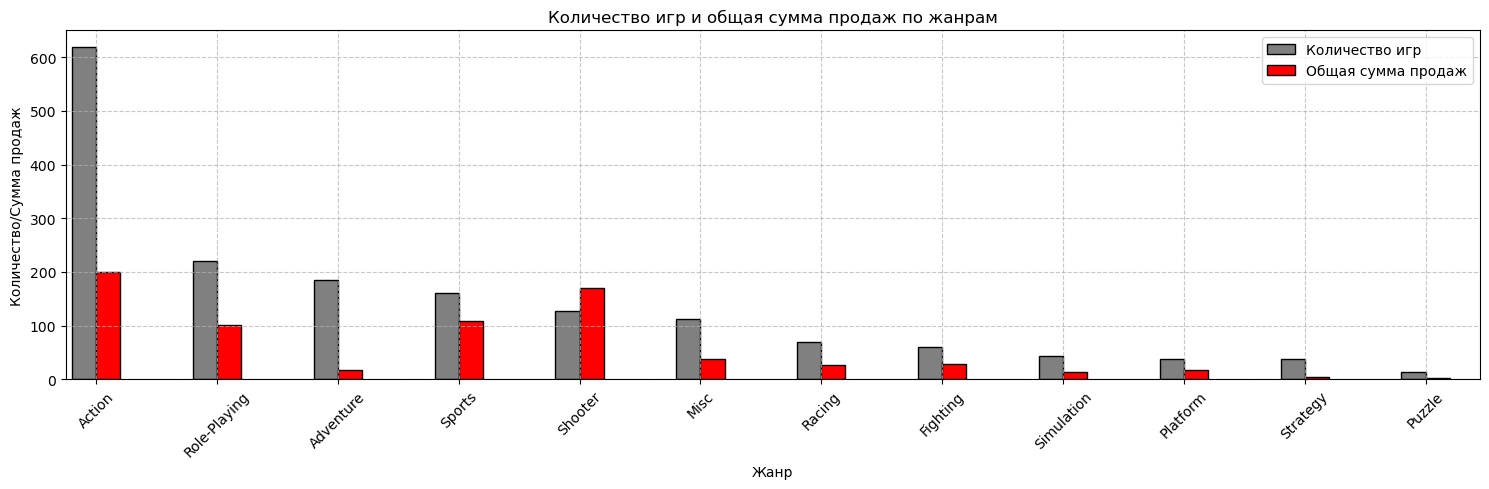

In [58]:
# Фильтруем данные по годам
filtered_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

# Группировка по жанрам и агрегация данных
pivot = filtered_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

# Визуализация
ax = plt.gca()

# Объём продаж (количество игр)
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15, 5), ec='black', ax=ax, width=0.2, position=1, color='grey')

# Общая сумма продаж
plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15, 5), ec='black', ax=ax, width=0.2, position=0, color='red')

# Настройка осей
ax.set_ylabel('Количество/Сумма продаж')
ax.set_xlabel('Жанр')
ax.set_title('Количество игр и общая сумма продаж по жанрам')

# Добавление легенды
ax.legend(['Количество игр', 'Общая сумма продаж'])

# Поворот меток на оси X
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
# Вывод графика
plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

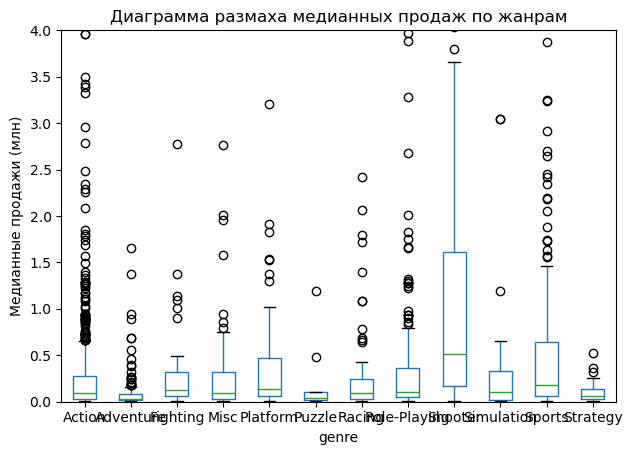

In [59]:
# Предположим, что у вас уже есть отфильтрованные данные
filtered_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

# Диаграмма размаха для медианных продаж
plt.figure(figsize=(20, 10))
filtered_data.boxplot(column='total_sales', by='genre', grid=False)
plt.ylabel('Медианные продажи (млн)')
plt.title('Диаграмма размаха медианных продаж по жанрам')
plt.suptitle('')  # Убираем лишний заголовок

# Настройка отображения
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

In [60]:
display(pivot)

,name,total_sales
genre,,
Action,619,199.36
Role-Playing,221,101.44
Adventure,185,17.55
Sports,161,109.48
Shooter,128,170.94
Misc,113,37.55
Racing,69,27.52
Fighting,60,28.22
Simulation,44,13.13


## Вывод по статистике продаж игр (2014-2016)

- **Общее снижение продаж:** В период с 2014 по 2016 год наблюдается снижение продаж игр с 1,5 миллиарда единиц в 2014 году до 1 миллиарда в 2016 году, что указывает на "затухание" рынка видеоигр.

- **Лидирующие платформы:** PS4 и PS3 занимают верхние позиции по продажам, с PS4, реализовавшей более 50 миллионов копий игр, и PS3 с 40 миллионами. В то же время, PSP и PSV показывают значительно меньшие результаты, с продажами менее 10 миллионов копий.

- **Разброс продаж:** PS4 демонстрирует наибольшее стандартное отклонение в продажах, достигающее 15 миллионов копий в год, что указывает на значительные колебания.

- **Корреляция оценок и продаж:** Корреляция между оценками критиков и продажами составляет 0,75, что выше, чем 0,5 между пользовательскими оценками и продажами. Это подчеркивает важность критических отзывов в формировании спроса на игры.

- **Популярные жанры:** Жанр Action занимает лидирующие позиции как по количеству игр (619) и по суммарным продажам (199,36 миллионов копий). Жанр Role-Playing также демонстрирует хорошие результаты с 221 игрой и 101,44 миллиона копий. В то же время, жанры Strategy и Puzzle имеют наименьшие показатели, с продажами менее 50 миллионов копий.

- **Топ-3 платформы на 2016 год:** PS4, XOne и 3DS. PS4 имеет средние продажи 0,80 миллиона, PS3 — 0,63 миллиона, а 3DS — 0,50 миллиона.

- **Максимальные и минимальные продажи:** PS3 достигла максимума в 21,05 миллиона, в то время как минимальные продажи на всех платформах составляют 0,01 миллиона.

- **Количество игр:** 3DS лидирует по количеству игр (512), но средние продажи ниже, чем у PS4.

- **Корреляция по платформам:** X360 имеет наивысшую корреляцию для критических оценок (0,5257) и пользовательских оценок (0,3365). PS4 демонстрирует низкую корреляцию для пользовательских оценок (-0,0050).

Эти данные подчеркивают значительные изменения на рынке видеоигр в указанный период, а также различия в продажах и популярности между платформами и жанрами.

Также удалил выброс, а именно игру на платформе DS в 1985 году.

## Шаг 4: Формирование портрета пользователя каждого региона

## Изучим ТОП-5 платформ в Северной Америке, Европе и Японии по продажам.

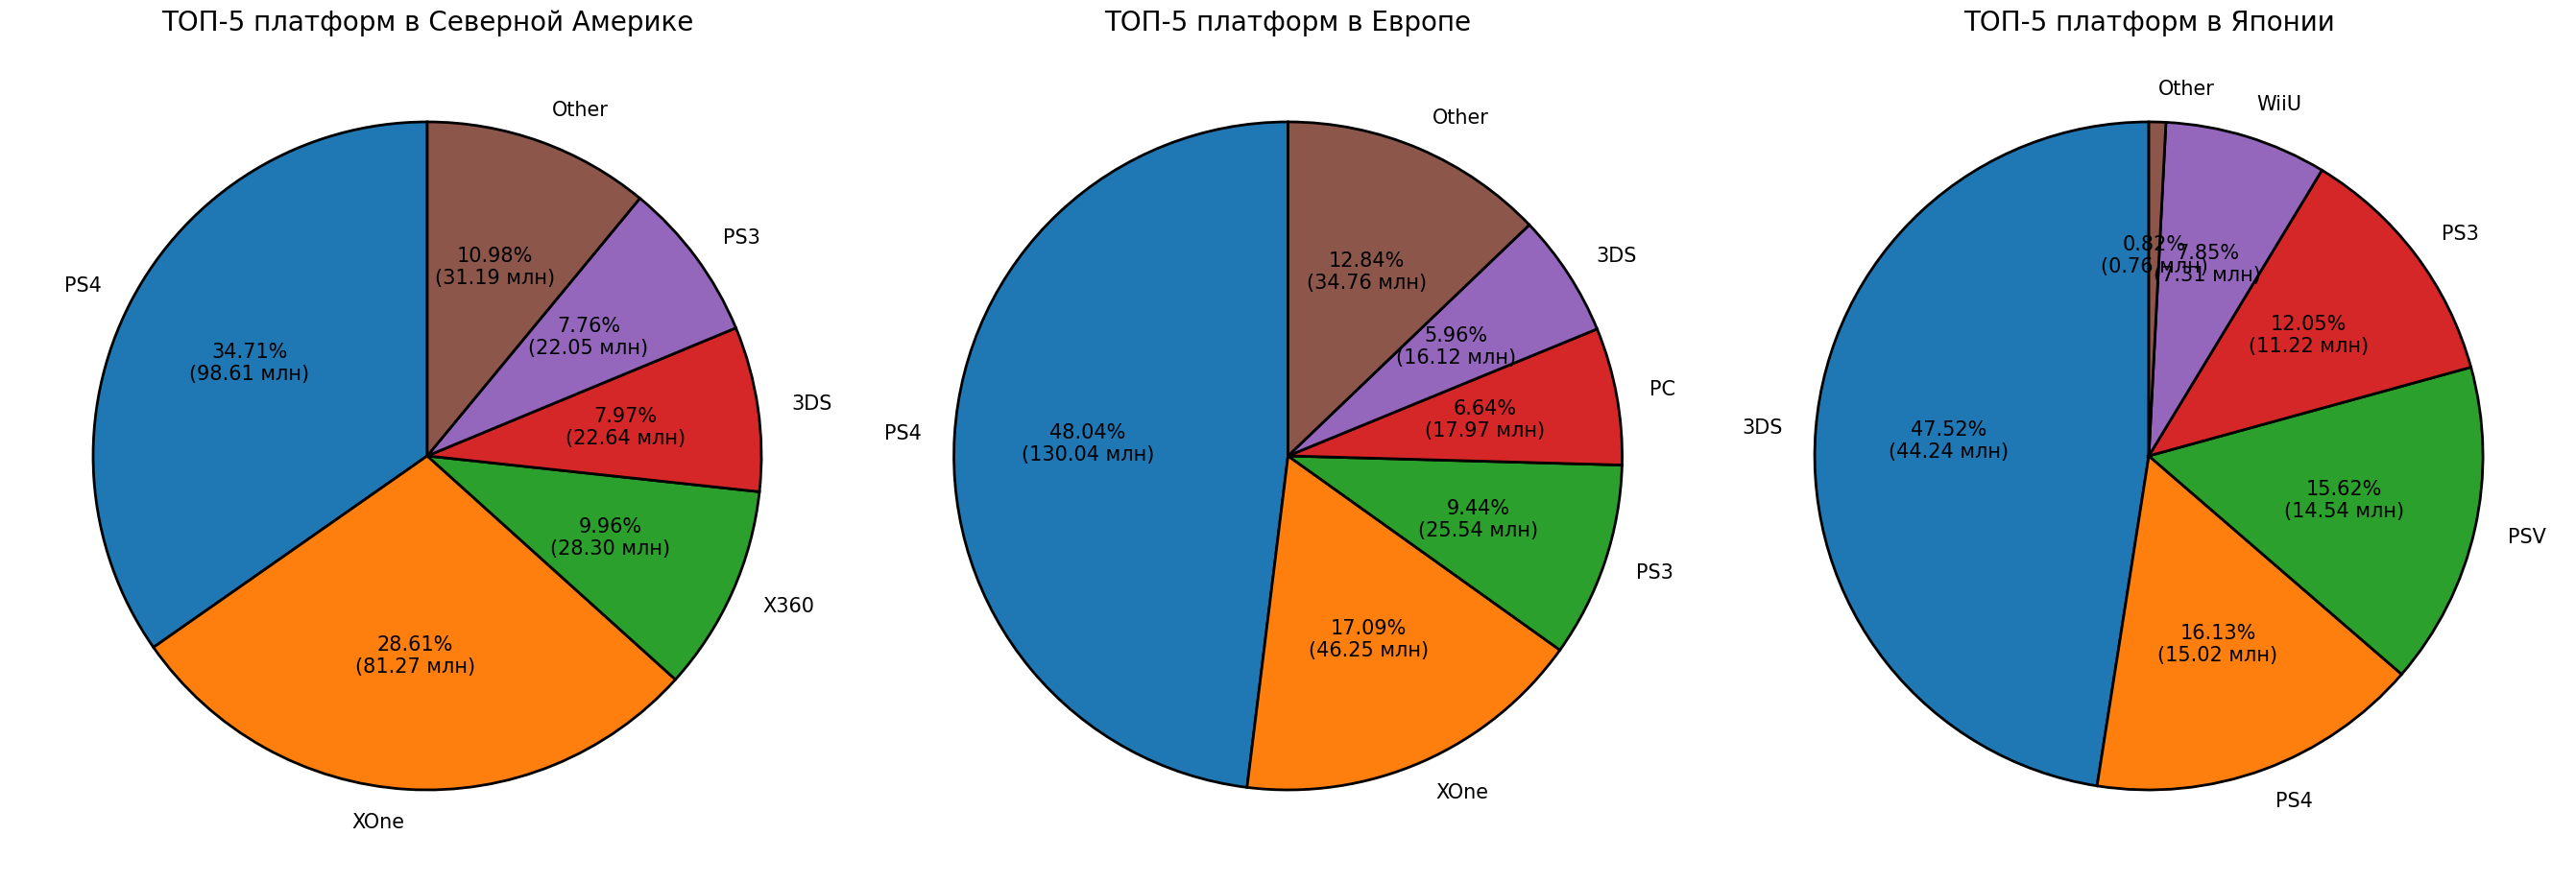

In [64]:

# Фильтрация данных за 2014-2016 годы
filtered_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

# Суммируем продажи по каждой платформе в каждом регионе
na_sales = filtered_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_sales = filtered_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_sales = filtered_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Получаем топ-5 платформ и суммарные продажи остальных
def add_other_category(sales):
    top_sales = sales.head(5)
    other_sales = sales[5:].sum()
    return pd.concat([top_sales, pd.Series({'Other': other_sales})])

na_sales = add_other_category(na_sales)
eu_sales = add_other_category(eu_sales)
jp_sales = add_other_category(jp_sales)

# Создание подграфиков
fig, axs = plt.subplots(1, 3, figsize=(27, 9))

# Настройка размера шрифта
font_size_title = 20
font_size_labels = 15

# Построение круговых диаграмм с яркой черной окантовкой
for ax, sales, title in zip(axs, [na_sales, eu_sales, jp_sales], 
                            ['ТОП-5 платформ в Северной Америке', 
                             'ТОП-5 платформ в Европе', 
                             'ТОП-5 платформ в Японии']):
    ax.pie(sales, labels=sales.index, 
           autopct=lambda p: f'{p:.2f}%\n({p * sales.sum() / 100:.2f} млн)', 
           startangle=90, 
           wedgeprops=dict(edgecolor='black', linewidth=2))
    ax.set_title(title, fontsize=font_size_title)

    # Установка размера шрифта для значений на диаграммах
    for text in ax.texts:
        text.set_fontsize(font_size_labels)

# Размещение графиков
plt.tight_layout()
plt.show()

<span style="color:blue;">

    
## Вывод по статистике продаж игр по платформам

- **Наиболее успешные платформы в Северной Америке (NA):** 
  - PS4 занимает лидирующую позицию с продажами 98.61 млн копий(34,71% от всего рынка).
  - XOne следует за ней с 81.27 млн копий(28,61% от всего рынка).
  - X360, 3DS и PS3 имеют значительно меньшие показатели, составив 28.30 млн(9,96% от всего рынка), 22.64 млн(7,97% от всего рынка) и 22.05 млн(7,76% от всего рынка) соответственно. Остальные платформы занимают 10,98% от рынка(31,19 млн. копий)

- **Наиболее успешные платформы в Европе (EU):** 
  - PS4 также лидирует с 130.04 млн копий(48,04% от всего рынка).
  - XOne занимает второе место с 46.25 млн копий(17,09% от всего рынка).
  - PS3, PC и 3DS показывают более низкие результаты, с продажами 25.54 млн(9,44% от всего рынка), 17.97 млн(6,64% от всего рынка) и 16.12 млн(7,76% от всего рынка) соответственно. Остальные платформы занимают 12,84% от рынка(34,76 млн. копий), показывая наивысший показатель "других" платформ среди рассмотренных регионов.

- **Наиболее успешные платформы в Японии (JP):** 
  - 3DS демонстрирует наибольшие продажи с 44.24 млн копий(47,52% от всего рынка).
  - PS4 и PSV следуют за ней с 15.02 млн(16,13% от всего рынка) и 14.54 млн(15,62% от всего рынка) соответственно.
  - PS3 и WiiU имеют меньшие показатели, составив 11.22 млн(12,05% от всего рынка) и 7.31 млн(7,85% от всего рынка). Остальные платформы имеют крайне малую долю рынка 0,82% (760 тысяч копий)
    
    Сравнение

Лидеры продаж: В Северной Америке и Европе PS4 является лидером, в то время как в Японии это 3DS.

Разнообразие платформ: Европа демонстрирует более разнообразный рынок с заметными продажами PS3 и PC, в то время как в Японии доминируют портативные консоли.

Доля "Other": В Северной Америке и Европе доля "Other" значительна, в то время как в Японии она практически отсутствует.
Эти различия могут быть связаны с культурными предпочтениями, доступностью платформ и маркетинговыми стратегиями в разных регионах.

</span>

## Изучим ТОП-5 жанров в Северной Америке, Европе и Японии по продажам.

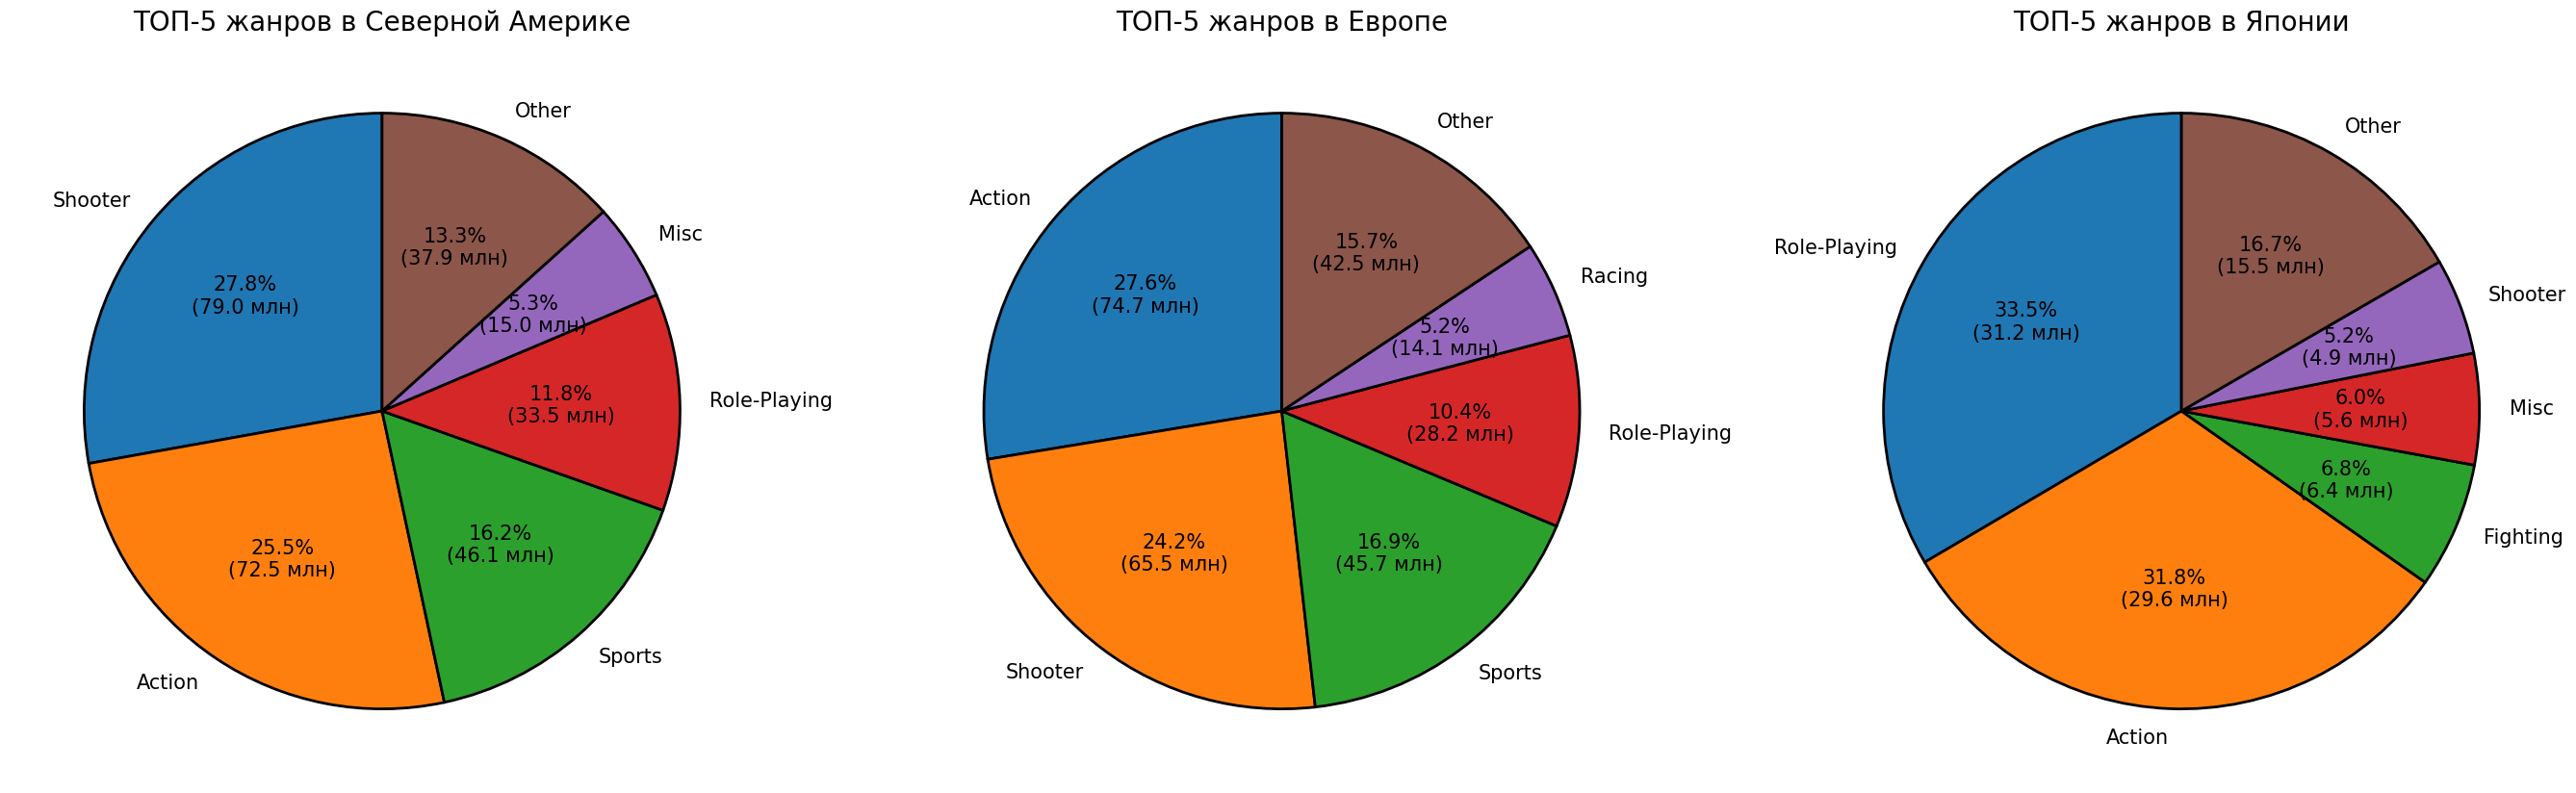

In [67]:
# Фильтрация данных за 2014-2016 годы
filtered_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

# Суммируем продажи по каждому жанру в каждом регионе
na_sales = filtered_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_sales = filtered_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_sales = filtered_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Функция для добавления категории "Other"
def add_other_category(sales):
    top_sales = sales.head(5)
    other_sales = sales[5:].sum() if len(sales) > 5 else 0
    return pd.concat([top_sales, pd.Series({'Other': other_sales})])

na_sales = add_other_category(na_sales)
eu_sales = add_other_category(eu_sales)
jp_sales = add_other_category(jp_sales)

# Создание подграфиков
fig, axs = plt.subplots(1, 3, figsize=(27, 9))  # Увеличиваем размер графиков

# Установка размера шрифта
font_size_title = 20
font_size_labels = 15

# Построение круговых диаграмм с яркой черной окантовкой и значениями продаж
for ax, sales, title in zip(axs, [na_sales, eu_sales, jp_sales], 
                             ['ТОП-5 жанров в Северной Америке', 
                              'ТОП-5 жанров в Европе', 
                              'ТОП-5 жанров в Японии']):
    ax.pie(sales, labels=sales.index, 
           autopct=lambda p: f'{p:.1f}%\n({p * sales.sum() / 100:.1f} млн)', 
           startangle=90, 
           wedgeprops=dict(edgecolor='black', linewidth=2))
    ax.set_title(title, fontsize=font_size_title)

# Установка размера шрифта для значений на диаграммах
for i, ax in enumerate(axs):
    for text in ax.texts:
        text.set_fontsize(font_size_labels)

# Размещение графиков
plt.tight_layout()
plt.show()

<span style="color:blue;">

## Вывод по статистике продаж игр по жанрам

- **Наиболее успешные жанры в Северной Америке (NA):**
  - Жанр Shooter занимает лидирующую позицию с продажами 79.02 млн копий (27,8% от всего рынка).
  - Action следует за ним с 72.53 млн копий (25,5% от всего рынка).
  - Sports, Role-Playing и Misc имеют значительно меньшие показатели, составив 46.13 млн (16,2% от всего рынка), 33.47 млн (11,8% от всего рынка) и 15.05 млн (5,3% от всего рынка) соответственно. Остальные жанры занимают 13,3% от рынка (37,9 млн. копий)

- **Наиболее успешные жанры в Европе (EU):**
  - Action также лидирует с 74.68 млн копий (27,6% от всего рынка).
  - Shooter занимает второе место с 65.52 млн копий (24,2% от всего рынка).
  - Sports, Role-Playing и Racing показывают более низкие результаты, с продажами 45.73 млн (16,9% от всего рынка), 28.17 млн (10,4% от всего рынка) и 14.13 млн (5,2% от всего рынка) соответственно. Остальные жанры занимают 15,7% от рынка (42,5 млн. копий).

- **Наиболее успешные жанры в Японии (JP):**
  - Жанр Role-Playing демонстрирует наибольшие продажи с 31.16 млн копий (33,5% от всего рынка).
  - Action следует за ним с 29.58 млн (31,8% от всего рынка).
  - Fighting, Misc и Shooter имеют меньшие показатели, составив 6.37 млн (6,8% от всего рынка), 5.61 млн (6% от всего рынка) и 4.87 млн (5,2% от всего рынка). Остальные жанры занимают 16,7% от рынка (15,5 млн. копий), что является наивысшим показателем "других" жанров среди рассмотренных регионов.
    
    Сравнение

Лидеры продаж: В Северной Америке и Европе жанры Shooter и Action занимают ведущие позиции, в то время как в Японии это Role-Playing.

Разнообразие жанров: Европа демонстрирует более разнообразный рынок с заметными продажами в жанрах Action, Shooter и Sports, в то время как в Японии доминируют RPG.

Доля "Other": В Северной Америке и Европе доля "Other" значительна, в то время как в Японии она практически отсутствует.
Эти различия могут быть связаны с культурными предпочтениями, доступностью игр и маркетинговыми стратегиями в разных регионах.
    
</span>

## Изучим рейтинг ESRB в Северной Америке, Европе и Японии по продажам. Разобьем на 5 возрастных групп.

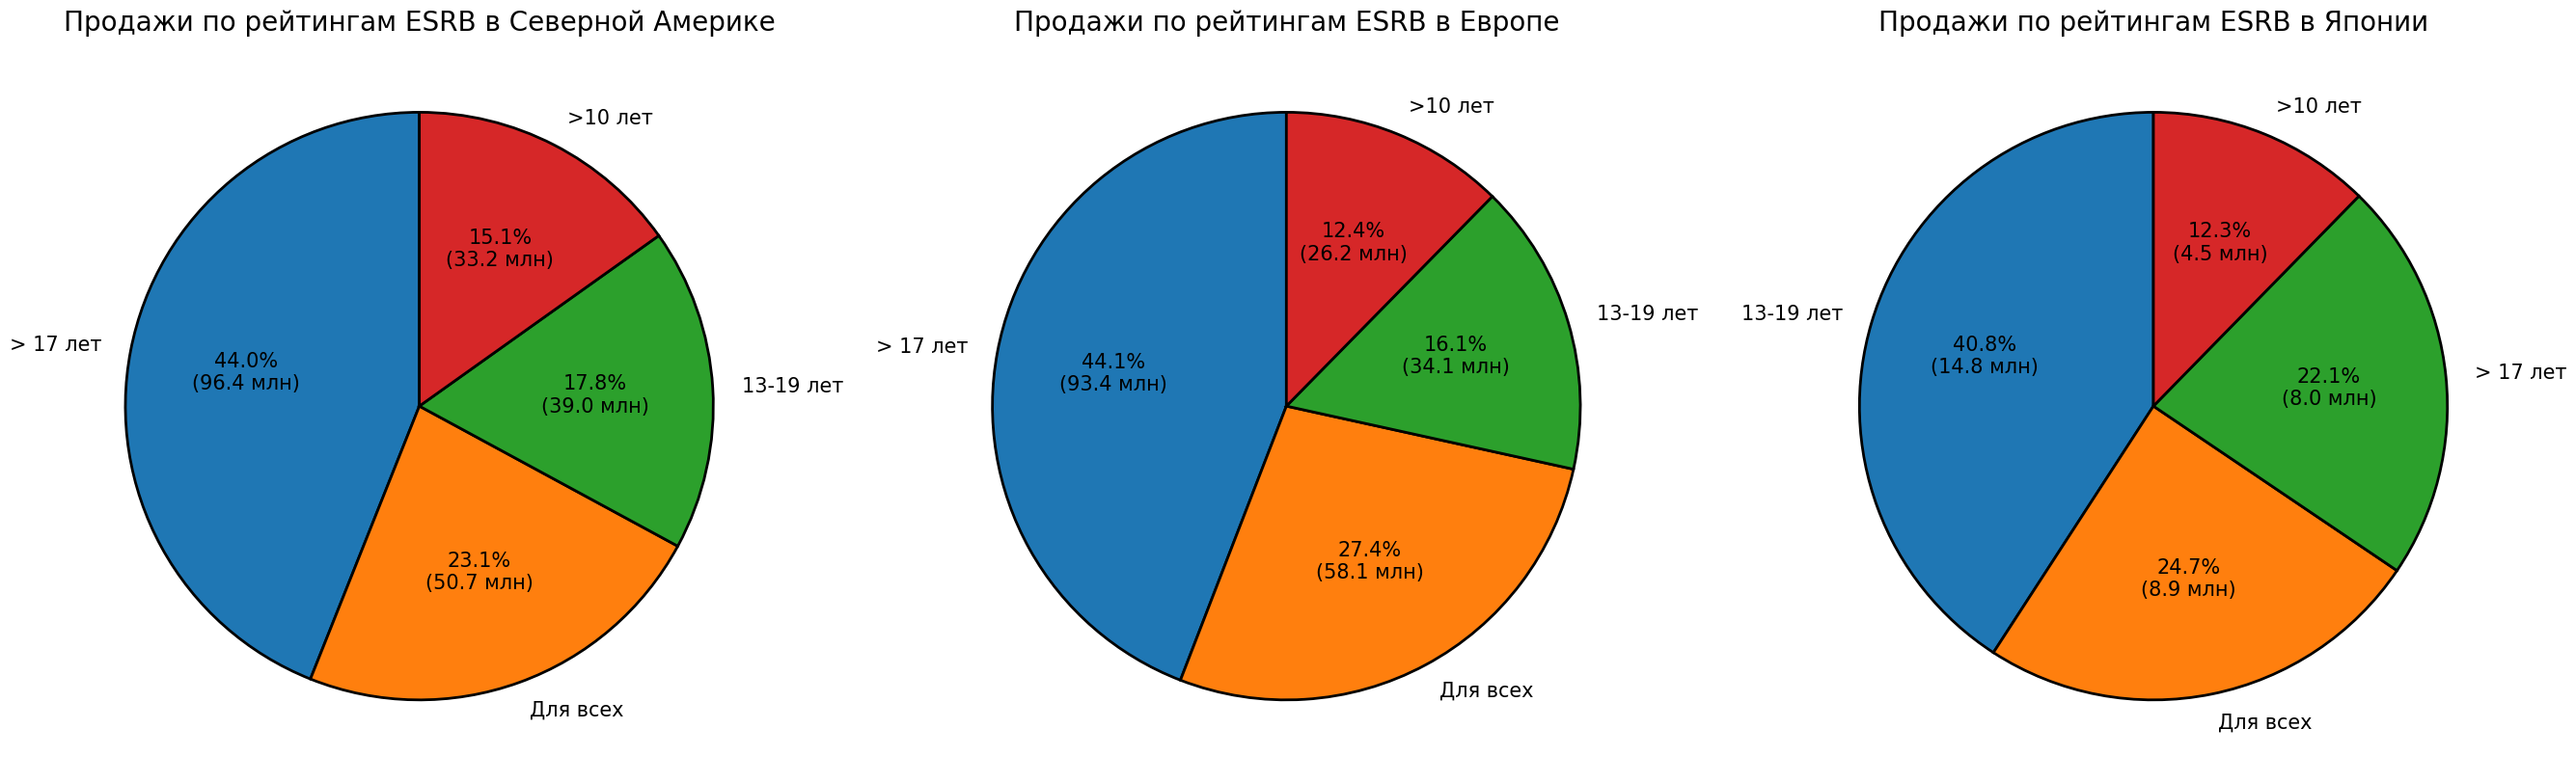

In [70]:
# Добавляем описание ESRB
ESRB_dict = {
    'E': 'Для всех',
    'M': '> 17 лет',
    'T': '13-19 лет',
    'E10+': '>10 лет',
    'K-A': 'Для всех(устар.)'
}
filtered_data['ESRB_description'] = filtered_data['rating'].map(ESRB_dict)

# Суммируем продажи по каждому ESRB-рейтингу в каждом регионе и сортируем от большего к меньшему
na_sales = filtered_data.groupby('ESRB_description')['na_sales'].sum().sort_values(ascending=False)
eu_sales = filtered_data.groupby('ESRB_description')['eu_sales'].sum().sort_values(ascending=False)
jp_sales = filtered_data.groupby('ESRB_description')['jp_sales'].sum().sort_values(ascending=False)

# Создание подграфиков
fig, axs = plt.subplots(1, 3, figsize=(27, 9))  # Увеличиваем размер графиков

# Установка размера шрифта
font_size_title = 20
font_size_labels = 15

# Построение круговых диаграмм с яркой черной окантовкой и значениями продаж
for ax, sales, title in zip(axs, [na_sales, eu_sales, jp_sales], 
                             ['Продажи по рейтингам ESRB в Северной Америке', 
                              'Продажи по рейтингам ESRB в Европе', 
                              'Продажи по рейтингам ESRB в Японии']):
    ax.pie(sales, labels=sales.index, autopct=lambda p: f'{p:.1f}%\n({p * sales.sum() / 100:.1f} млн)',
           startangle=90, wedgeprops=dict(edgecolor='black', linewidth=2))
    ax.set_title(title, fontsize=font_size_title)

    # Установка размера шрифта для значений на диаграммах
    for text in ax.texts:
        text.set_fontsize(font_size_labels)

# Размещение графиков
plt.tight_layout()
plt.show()

<span style="color:blue;">
    
- **Наиболее значительная категория:** Наибольшие продажи наблюдаются среди игр для аудитории 17 лет и старше, с показателями 96.42 млн (NA) и 93.44 млн (EU).

- **Продажи для всех возрастов:** Игры, подходящие для всех возрастов, также демонстрируют значительные продажи — 50.74 млн (NA) и 58.06 млн (EU).

- **Подростковая аудитория:** Категория 13-19 лет показывает заметные продажи — 38.95 млн (NA) и 34.07 млн (EU), что указывает на интерес этой возрастной группы к видеоиграм.

- **Меньшие продажи для младших категорий:** Продажи игр для возрастной группы старше 10 лет составляют 33.23 млн (NA) и 26.16 млн (EU), а для категории 10 лет и младше — значительно ниже, с показателями 4.46 млн.

Эти данные подчеркивают, что основная аудитория для видеоигр сосредоточена в возрастных группах 17 лет и старше, а также среди игр, подходящих для всех возрастов.

Сравнение

Лидеры продаж: В Северной Америке и Европе доминируют игры для взрослых, в то время как в Японии наибольшие продажи у игр для подростков.

Разнообразие аудитории: Европа демонстрирует более широкий интерес к играм для всех возрастов, в то время как Япония ориентирована на молодежную аудиторию.

Влияние рейтинга: Рейтинг ESRB действительно влияет на продажи, но в зависимости от региона предпочтения игроков могут значительно различаться.
    
</span>

### Вывод по статистике продаж игр

- **Возрастные категории:**

- Наибольшие продажи среди игр для аудитории 17 лет и старше (96.42 млн в NA и 93.44 млн в EU).

- Значительные продажи для игр, подходящих для всех возрастов (50.74 млн в NA и 58.06 млн в EU).

- Подростковая аудитория (13-19 лет) также показывает заметные продажи (38.95 млн в NA и 34.07 млн в EU).

- **Жанры:**

- В Северной Америке (NA) лидирует жанр Shooter (79.02 млн), за ним следует Action (72.53 млн).

- В Европе (EU) также лидирует Action (74.68 млн), Shooter на втором месте (65.52 млн).

- В Японии (JP) наибольшие продажи у жанра Role-Playing (31.16 млн).

- **Платформы:**

- В NA наибольшие продажи у PS4 (98.61 млн), затем XOne (81.27 млн).

- В EU также лидирует PS4 (130.04 млн), за ней XOne (46.25 млн).

- В JP наибольшие продажи у 3DS (44.24 млн), затем PS4 (15.02 млн). 

Эти данные подчеркивают разнообразие предпочтений в зависимости от региона, возраста и жанра.

## Шаг 5: Проверка гипотез

Принимаем нулевую гипотезу (Н0) - Средние пользовательские рейтинги Xbox One и PC одинаковы, соответственно (Н1) - рейтинги разные. 

Задаем p_value = 0.05

In [74]:
# Фильтруем данные за период 2014-2016 года
data_filtered = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]
data_filtered = data_filtered[data_filtered['user_score'] != -1]

# Преобразуем user_score в числовой формат (если необходимо)
data_filtered['user_score'] = pd.to_numeric(data_filtered['user_score'], errors='coerce')

# Удаляем все значения NaN после преобразования
data_filtered = data_filtered.dropna(subset=['user_score'])

# Вычисляем средние пользовательские рейтинги для Xbox One и PC
mean_xbox = data_filtered[data_filtered['platform'] == 'XOne']['user_score'].mean()
mean_pc = data_filtered[data_filtered['platform'] == 'PC']['user_score'].mean()

# Проведение t-теста
xbox_scores = data_filtered[data_filtered['platform'] == 'XOne']['user_score']
pc_scores = data_filtered[data_filtered['platform'] == 'PC']['user_score']
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores)

# Вывод результата теста и средних значений
print(f"Средний рейтинг пользователей Xbox One: {mean_xbox:.2f}")
print(f"Средний рейтинг пользователей PC: {mean_pc:.2f}")
print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.8f}")

# Интерпретация результата
if p_value < 0.05:
    print("Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги Xbox One и PC различаются.")
else:
    print("У нас нет оснований отвергать нулевую гипотезу. Средние пользовательские рейтинги Xbox One и PC одинаковы.")

Средний рейтинг пользователей Xbox One: 6.59
Средний рейтинг пользователей PC: 6.30
T-статистика: 1.6286
P-значение: 0.10450508
У нас нет оснований отвергать нулевую гипотезу. Средние пользовательские рейтинги Xbox One и PC одинаковы.


#### Формулировка гипотез:
- **Нулевая гипотеза (H0)**: Средние пользовательские рейтинги Xbox One и PC одинаковы.
- **Альтернативная гипотеза (H1)**: Средние пользовательские рейтинги Xbox One и PC различаются.

#### Применяемый критерий:
Для проверки гипотез был использован **t-критерий** для независимых выборок. Этот критерий подходит, так как:
- Мы сравниваем средние значения двух независимых групп (Xbox One и PC).
- Данные предполагаются нормально распределенными, что является одним из условий применения t-критерия.
- Размеры выборок достаточно велики, что позволяет использовать t-критерий даже при незначительных отклонениях от нормальности.

Таким образом, t-критерий позволяет оценить, есть ли статистически значимые различия между средними пользовательскими рейтингами двух платформ.

Задаем p_value = 0.05

In [76]:
# Вычисляем средние пользовательские рейтинги для жанров Action и Sports
mean_action = data_filtered[data_filtered['genre'] == 'Action']['user_score'].mean()
mean_sports = data_filtered[data_filtered['genre'] == 'Sports']['user_score'].mean()

# Проведение t-теста
action_scores = data_filtered[data_filtered['genre'] == 'Action']['user_score']
sports_scores = data_filtered[data_filtered['genre'] == 'Sports']['user_score']
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores)

# Вывод результата теста и средних значений
print(f"Средний рейтинг пользователей Action: {mean_action:.2f}")
print(f"Средний рейтинг пользователей Sports: {mean_sports:.2f}")
print(f"T-статистика: {t_stat:.4f}")
print(f"P-значение: {p_value:.5f}")

# Интерпретация результата
if p_value < 0.05:
    print("Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги Action и Sports различаются.")
else:
    print("У нас нет оснований отвергать нулевую гипотезу. Средние пользовательские рейтинги Action и Sports одинаковы.")

Средний рейтинг пользователей Action: 6.76
Средний рейтинг пользователей Sports: 5.23
T-статистика: 9.4252
P-значение: 0.00000
Мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги Action и Sports различаются.



### Общий вывод

В первом тесте мы пришли к выводу, что нет достаточных оснований для того, чтобы утверждать, что средние пользовательские рейтинги Xbox One и PC отличаются друг от друга. Это означает, что по имеющимся данным можно считать, что пользователи оценивают эти платформы схожим образом.
Во втором тесте, наоборот, мы обнаружили, что есть основания отвергнуть нулевую гипотезу, что говорит о том, что средние пользовательские рейтинги игр в жанрах Action и Sports различаются. Это может указывать на то, что пользователи по-разному воспринимают и оценивают игры в этих жанрах.

## Шаг 6: Прогнозирование данных (собственная инициатива)

### С помощью линейной регрессии сделаем прогноз выручки с продаж игр для PS4 на 2017 год.

Прогнозируемые продажи PS4 на 2017 год: 65.3 млн.


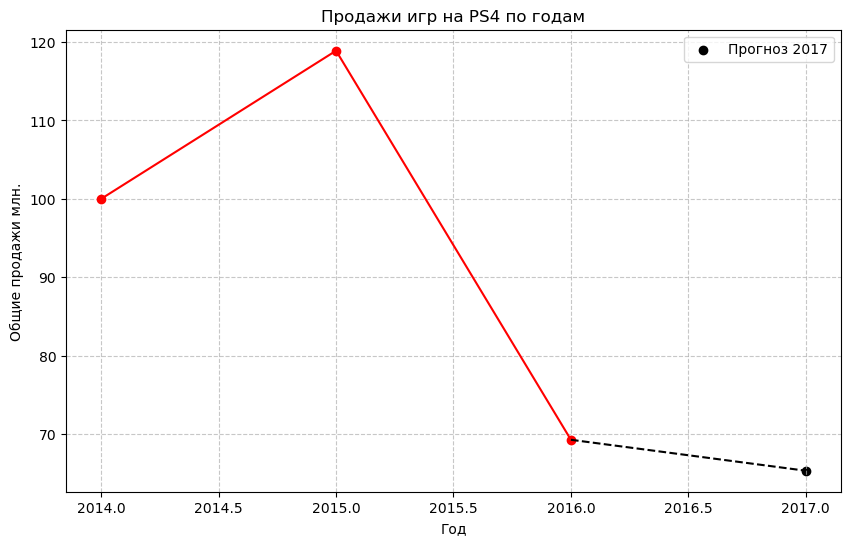

In [79]:
ps4_sales = sales_by_platform.loc[:, 'PS4']

# График
plt.figure(figsize=(10, 6))
plt.plot(ps4_sales.index, ps4_sales.values, color='red', marker='o')  # Основной график

# Установка заголовка и меток осей
plt.title('Продажи игр на PS4 по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи млн.')

# Прогноз
years = np.array([[2014], [2015], [2016]])
sales = np.array(ps4_sales.iloc[-3:]).reshape(-1, 1)

model = LinearRegression()
model.fit(years, sales)

# Прогноз на 2017 год
predicted_sales_2017 = model.predict([[2017]])
rounded_sales = round(predicted_sales_2017[0][0], 2)
print(f"Прогнозируемые продажи PS4 на 2017 год: {rounded_sales} млн.")

# На графике
plt.scatter([2017], predicted_sales_2017, color='black', label='Прогноз 2017')  # Прогноз на 2017 год

# Соединяем точку 2016 года с прогнозом на 2017 год
plt.plot([2016, 2017], [ps4_sales.iloc[-1], predicted_sales_2017[0][0]], color='black', linestyle='--')

# Настройка графика
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

<span style="color:blue;">

Согласно прогнозу продажи игр на PS4 в 2017 году снизятся до 56.01 млн
</span>

### Аналогичным образом с помощью линейной регрессии сделаем прогноз количества игр для жанров Action и Sports на 2017 год.

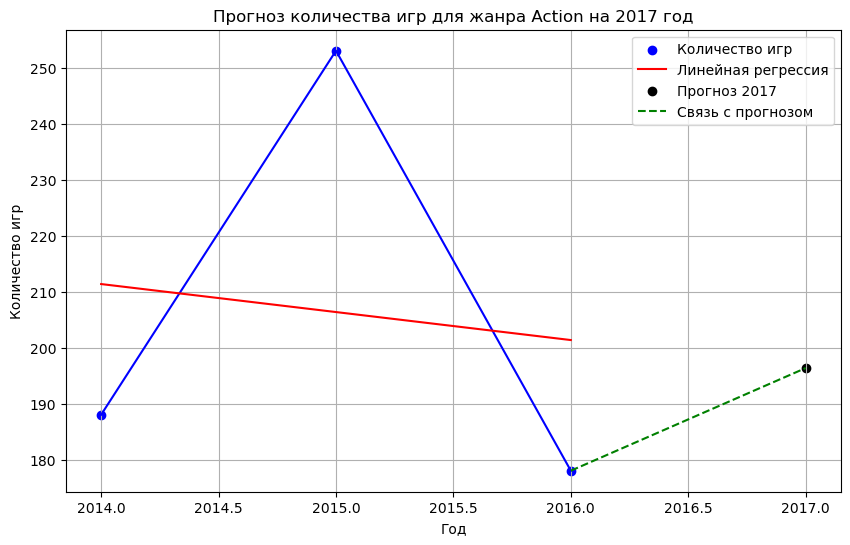

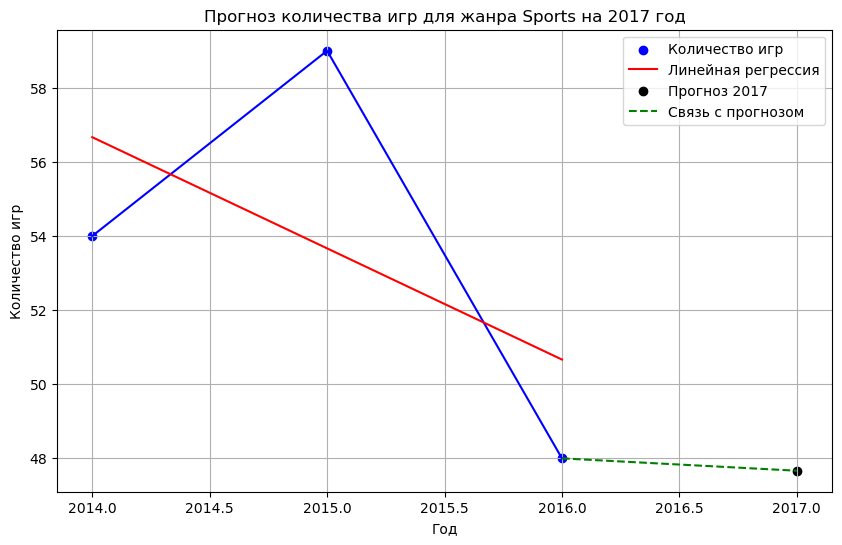

Прогнозируемое количество игр для жанра Action на 2017 год: 196 шт.
Прогнозируемое количество игр для жанра Sports на 2017 год: 48 шт.


In [82]:
# Фильтруем данные за период 2014-2016 года
data_filtered = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]
genres = ['Action', 'Sports']

# Создаем DataFrame для хранения количества игр по годам для каждого жанра
games_per_year = {}

for genre in genres:
    games_per_year[genre] = data_filtered[data_filtered['genre'] == genre].groupby('year_of_release').agg({'name': 'count'}).reset_index()

# Прогнозируем количество игр на 2017 год
predictions = {}
for genre in genres:
    years = games_per_year[genre]['year_of_release'].values.reshape(-1, 1)
    counts = games_per_year[genre]['name'].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(years, counts)

    # Прогноз на 2017 год
    predicted_count = model.predict([[2017]])[0][0]
    predictions[genre] = predicted_count

    # Визуализация результата
    plt.figure(figsize=(10, 6))
    plt.scatter(years, counts, color='blue', label='Количество игр')
    
    # Соединяем точки линией
    plt.plot(years, counts, color='blue', linestyle='-')

    # Линия регрессии сплошная
    plt.plot(years, model.predict(years), color='red', linestyle='-', label='Линейная регрессия')

    # Точка прогноза
    plt.scatter([2017], [predicted_count], color='black', label='Прогноз 2017')

    # Соединяем точку прогноза со сплошной линией
    plt.plot([years[-1][0], 2017], [counts[-1][0], predicted_count], color='green', linestyle='--', label='Связь с прогнозом')

    plt.title(f'Прогноз количества игр для жанра {genre} на 2017 год')
    plt.xlabel('Год')
    plt.ylabel('Количество игр')
    plt.legend()
    plt.grid()
    plt.show()

# Вывод прогнозов
for genre, count in predictions.items():
    print(f"Прогнозируемое количество игр для жанра {genre} на 2017 год: {count:.0f} шт.")

<span style="color:blue;">

Согласно прогнозу Прогнозируемое количество игр для жанров Action и Sports на 2017 год снизятся до значений 207 шт. и 22 шт. соответственно.
</span>

# Выводы и рекомендации по проекту анализа продаж игр

## Выводы


### Предобработка данных

Проведена проверка на наличие явных и неявных дубликатов, что позволяет обеспечить уникальность записей. Все названия столбцов были приведены к нижнему регистру для унификации и удобства работы с данными. Столбец `user_score` был преобразован в тип данных `float`, что позволяет проводить числовые операции. Добавлен столбец с суммарными продажами, что позволяет более эффективно анализировать данные. В столбцах `critic_score`, `user_score` и `rating` вместо пропусков были установлены заглушки, что помогает избежать искажений в анализе.

### Статистические тесты
Проведенные t-тесты показали статистически значимые различия в средних пользовательских рейтингах между платформами Xbox One и PC, а также между жанрами Action и Sports. Это указывает на различные предпочтения пользователей в зависимости от платформы и жанра игр.

### Анализ продаж
Наблюдается общее снижение продаж игр с 2014 по 2016 год, что может свидетельствовать о "затухании" рынка видеоигр. PS4 и PS3 занимают лидирующие позиции по продажам, в то время как PSP и PSV показывают значительно меньшие результаты. Жанр Action является наиболее популярным как по количеству игр, так и по суммарным продажам, в то время как жанры Strategy и Puzzle имеют наименьшие показатели.

### Региональные предпочтения
Продажи игр варьируются в зависимости от региона, возраста и жанра. В Северной Америке и Европе лидируют жанры Shooter и Action, в то время как в Японии наибольшие продажи у жанра Role-Playing.
- В разных регионах наблюдаются различные предпочтения:

- **Северная Америка**: X360 доминирует по продажам.

- **Европа**: PS2 занимает лидирующие позиции.

- **Япония**: Наибольшие продажи у платформы DS.

### Корреляция оценок и продаж
Существует высокая корреляция между оценками критиков и продажами (0,75), что подчеркивает важность критических отзывов в формировании спроса на игры.

### Прогнозы на 2017 год
Ожидается снижение продаж игр на PS4 до 65,3 млн, а также сокращение количества игр в жанрах Action и Sports.

### Анализ игровой индустрии
По проведенному анализу, на итоговую выручку в основном влияют оценки критиков, в то время как оценки пользователей не оказывают такого же влияния. Это требует дальнейшего изучения.

В целом, рынок "немобильных" игр находится в упадке. Разработчики сосредоточены на графике и новых технологиях, что привело к значительному увеличению бюджета на разработку игр. Современные игроки ценят визуальные эффекты и оптимизацию больше, чем глубину и идею игры. Многие предпочитают простоту, что делает сложные игры менее привлекательными.

В результате крупные компании стремятся к технологическим достижениям, в то время как небольшие студии, не имеющие таких ресурсов, теряют свои позиции. Их способность создавать глубокие и атмосферные игры больше не ценится. Это приводит к продолжающемуся падению рынка, и, похоже, изменения в ценностях игроков не предвидится.

## Рекомендации

### Углубленный анализ предпочтений
Рекомендуется провести более детальный анализ предпочтений пользователей по платформам и жанрам, чтобы лучше понять, какие факторы влияют на выбор игр.

### Фокус на критические отзывы
Разработчикам игр следует уделять внимание критическим отзывам, так как они оказывают значительное влияние на продажи. Улучшение качества игр может привести к повышению пользовательских рейтингов и, соответственно, продаж.

### Адаптация к изменениям на рынке
Учитывая тенденцию к снижению продаж, компаниям следует адаптировать свои стратегии маркетинга и разработки, возможно, сосредоточившись на более популярных жанрах и платформах.

### Мониторинг региональных трендов
Рекомендуется регулярно отслеживать изменения в предпочтениях пользователей в разных регионах, чтобы своевременно реагировать на изменения в спросе.


Эти выводы и рекомендации могут помочь в дальнейшем развитии и адаптации стратегий в индустрии видеоигр, учитывая текущие тренды и предпочтения пользователей.